<a href="https://colab.research.google.com/github/CharlesCoster/ada-project-terrorism-impact/blob/master/part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from itertools import product
import numpy as np

In [71]:
terror = pd.read_csv('final_terrorism.csv')
tourism = pd.read_csv('final_tourism.csv',index_col=0)
econom = pd.read_csv('final_economic.csv',index_col=0)
politic = pd.read_csv('final_politic.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
countries = pd.read_csv('country_code.csv',encoding='latin')
countries.columns=['country_txt','country_code']

In [73]:
# Get data per year and per countries
df = terror.merge(countries,on='country_txt',how='left')
df.head()

,eventid,iyear,imonth,iday,country_txt,city,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targtype2_txt,weaptype1_txt,weaptype2_txt,weaptype3_txt,weaptype4_txt,gname,nkill,nkillter,country_code
0,197000000001,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,NaN,NaN,Private Citizens & Property,NaN,Unknown,NaN,NaN,NaN,MANO-D,1.0,NaN,DOM
1,197000000002,1970,0,0,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,23rd of September Communist League,0.0,NaN,MEX
2,197001000001,1970,1,0,Philippines,Unknown,Southeast Asia,Assassination,NaN,NaN,Journalists & Media,NaN,Unknown,NaN,NaN,NaN,Unknown,1.0,NaN,PHL
3,197001000002,1970,1,0,Greece,Athens,Western Europe,Bombing/Explosion,NaN,NaN,Government (Diplomatic),NaN,Explosives,NaN,NaN,NaN,Unknown,NaN,NaN,GRC
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),NaN,Incendiary,NaN,NaN,NaN,Unknown,NaN,NaN,JPN


In [0]:
dict_targets = {}
for (country, year), group in df.groupby(['country_code','iyear']):
  dict_targets[year,country] = {}
  for txt in ['targtype1_txt','targtype2_txt']:
    targets = group[txt].value_counts().to_dict()
    for tar in targets.keys():
      if tar not in ['Unknown','Other'] and tar in dict_targets[year,country]:
        dict_targets[year,country][tar] += targets[tar]
      elif tar not in ['Unknown','Other']:
        dict_targets[year,country][tar] = targets[tar]

In [57]:
target_df = pd.DataFrame.from_dict(dict_targets,orient='index')
target_df.fillna(0,inplace=True)

target_df.head()

,,Airports & Aircraft,Transportation,Government (Diplomatic),Tourists,Private Citizens & Property,Educational Institution,Business,Utilities,Violent Political Party,Government (General),NGO,Religious Figures/Institutions,Journalists & Media,Police,Terrorists/Non-State Militia,Military,Telecommunication,Food or Water Supply,Maritime,Abortion Related
1973,AFG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,AFG,1.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,AFG,2.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,11.0,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,AFG,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,AFG,1.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dict_attacks = {}
for (country, year), group in df.groupby(['country_code','iyear']):
  dict_attacks[year,country] = {}
  for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
    attacks = group[txt].value_counts().to_dict()
    for att in attacks.keys():
      if att in dict_attacks[year,country]:
        dict_attacks[year,country][att] += attacks[att]
      else:
        dict_attacks[year,country][att] = attacks[att]

In [65]:
attack_df = pd.DataFrame.from_dict(dict_attacks,orient='index')
attack_df.fillna(0,inplace=True)

attack_df.head()

,,Unknown,Bombing/Explosion,Armed Assault,Hostage Taking (Kidnapping),Unarmed Assault,Assassination,Facility/Infrastructure Attack,Hostage Taking (Barricade Incident),Hijacking
1973,AFG,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,AFG,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,AFG,5.0,34.0,28.0,9.0,1.0,6.0,2.0,0.0,0.0
2005,AFG,8.0,58.0,44.0,15.0,1.0,27.0,9.0,0.0,0.0
2006,AFG,8.0,148.0,79.0,22.0,0.0,21.0,19.0,1.0,0.0


In [67]:
type_terrorism = attack_df.merge(target_df,left_index=True,right_index=True, how='outer')
type_terrorism.head()

Unknown  Bombing/Explosion  ...  Maritime  Abortion Related
1970 ARG      0.0                4.0  ...       0.0               0.0
     AUS      0.0                1.0  ...       0.0               0.0
     BEL      0.0                1.0  ...       0.0               0.0
     BOL      0.0                0.0  ...       0.0               0.0
     BRA      0.0                0.0  ...       0.0               0.0

[5 rows x 29 columns]

In [75]:
terror_df = df.groupby(['iyear','country_code','region_txt']).size().to_frame().reset_index()
terror_df.rename(columns={0:'n_attacks','iyear':'year'}, inplace=True)

# Get all combinations of year/country possible
year = np.arange(terror_df.year.min(),terror_df.year.max()+1)
country = list(terror_df.country_code.unique())
df_comb = pd.DataFrame(list(product(year, country)), columns=['year', 'country_code'])
df_comb['data'] = 0
terror_df = df_comb.merge(terror_df,how='left')
terror_df.fillna(0,inplace=True)
terror_df.drop('data',axis=1,inplace=True)

terror_df = terror_df.merge(type_terrorism, right_index=True, left_on=['year','country_code'])
terror_df.head()

,year,country_code,region_txt,n_attacks,Unknown,Bombing/Explosion,Armed Assault,Hostage Taking (Kidnapping),Unarmed Assault,Assassination,Facility/Infrastructure Attack,Hostage Taking (Barricade Incident),Hijacking,Airports & Aircraft,Transportation,Government (Diplomatic),Tourists,Private Citizens & Property,Educational Institution,Business,Utilities,Violent Political Party,Government (General),NGO,Religious Figures/Institutions,Journalists & Media,Police,Terrorists/Non-State Militia,Military,Telecommunication,Food or Water Supply,Maritime,Abortion Related
0,1970,ARG,South America,20.0,0.0,4.0,7.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1970,AUS,Australasia & Oceania,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970,BEL,Western Europe,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970,BOL,South America,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970,BRA,South America,6.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
tourism.head()

,growth_export_tourism,growth_import_tourism,country_code,year
0,0.034807,-0.002004,AUS,2009
1,-0.002731,0.058791,AUS,2010
2,-0.021077,0.097287,AUS,2011
3,-0.021957,0.053171,AUS,2012
4,0.043211,0.093014,AUS,2013


In [0]:
econom.head()

,year,country_code,gdpgr,opengr
0,1960,AUS,NaN,NaN
1,1961,AUS,0.040831,-0.030252
2,1962,AUS,5.465480,0.009650
3,1963,AUS,6.141373,0.069650
4,1964,AUS,6.200315,-0.007824


In [0]:
politic.head()

,year,country_code,left_soc_inc,comm_inc,conserv_inc,right_inc,turnout
0,1960,AUS,NaN,NaN,NaN,NaN,95.5
1,1961,AUS,NaN,NaN,-3.6,NaN,95.3
2,1962,AUS,NaN,NaN,-3.6,NaN,95.3
3,1963,AUS,NaN,NaN,3.5,NaN,95.7
4,1964,AUS,NaN,NaN,3.5,NaN,95.7


In [24]:
# Happiness datas
happiness2015_df = pd.read_csv('2015.csv')
happiness2015_df.drop(['Region','Standard Error'],axis=1,inplace=True)
happiness2015_df.columns = ['country','happiness_rank','happiness_score','gdp_per_capita','family','life','freedom','generosity','trust','dystopia']
happiness2015_df['year'] = 2015

happiness2016_df = pd.read_csv('2016.csv')
happiness2016_df.drop(['Region','Lower Confidence Interval','Upper Confidence Interval'],axis=1,inplace=True)
happiness2016_df.columns= ['country','happiness_rank','happiness_score','gdp_per_capita','family','life','freedom','generosity','trust','dystopia']
happiness2016_df['year'] = 2016

happiness2017_df = pd.read_csv('2017.csv')
happiness2017_df.drop(['Whisker.high','Whisker.low'],axis=1,inplace=True)
happiness2017_df.columns= ['country','happiness_rank','happiness_score','gdp_per_capita','family','life','freedom','generosity','trust','dystopia']
happiness2017_df['year'] = 2017

happiness = happiness2015_df.merge(happiness2016_df,how='outer')
happiness = happiness.merge(happiness2017_df,how='outer')
happiness = happiness.merge(countries,right_on='country_txt',left_on='country',how='left')
happiness.drop(['country','happiness_rank'],axis=1,inplace=True)
happiness.head()

,happiness_score,gdp_per_capita,family,life,freedom,generosity,trust,dystopia,year,country_txt,country_code
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,Switzerland,CHE
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,Iceland,ISL
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,Denmark,DNK
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,Norway,NOR
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,Canada,CAN


In [76]:
from functools import reduce
dfs = [terror_df,tourism,econom,politic,happiness]
global_df = reduce(lambda left,right: pd.merge(left,right,on=['year','country_code'],how='outer'), dfs)
global_df.head()

,year,country_code,region_txt,n_attacks,Unknown,Bombing/Explosion,Armed Assault,Hostage Taking (Kidnapping),Unarmed Assault,Assassination,Facility/Infrastructure Attack,Hostage Taking (Barricade Incident),Hijacking,Airports & Aircraft,Transportation,Government (Diplomatic),Tourists,Private Citizens & Property,Educational Institution,Business,Utilities,Violent Political Party,Government (General),NGO,Religious Figures/Institutions,Journalists & Media,Police,Terrorists/Non-State Militia,Military,Telecommunication,Food or Water Supply,Maritime,Abortion Related,growth_export_tourism,growth_import_tourism,gdpgr,opengr,left_soc_inc,comm_inc,conserv_inc,right_inc,turnout,happiness_score,gdp_per_capita,family,life,freedom,generosity,trust,dystopia,country_txt
0,1970,ARG,South America,20.0,0.0,4.0,7.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,AUS,Australasia & Oceania,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,6.954851,-0.023110,NaN,NaN,-5.3,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,BEL,Western Europe,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,6.191994,0.028812,NaN,-1.3,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,BOL,South America,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,BRA,South America,6.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation matrices

## Western Europe

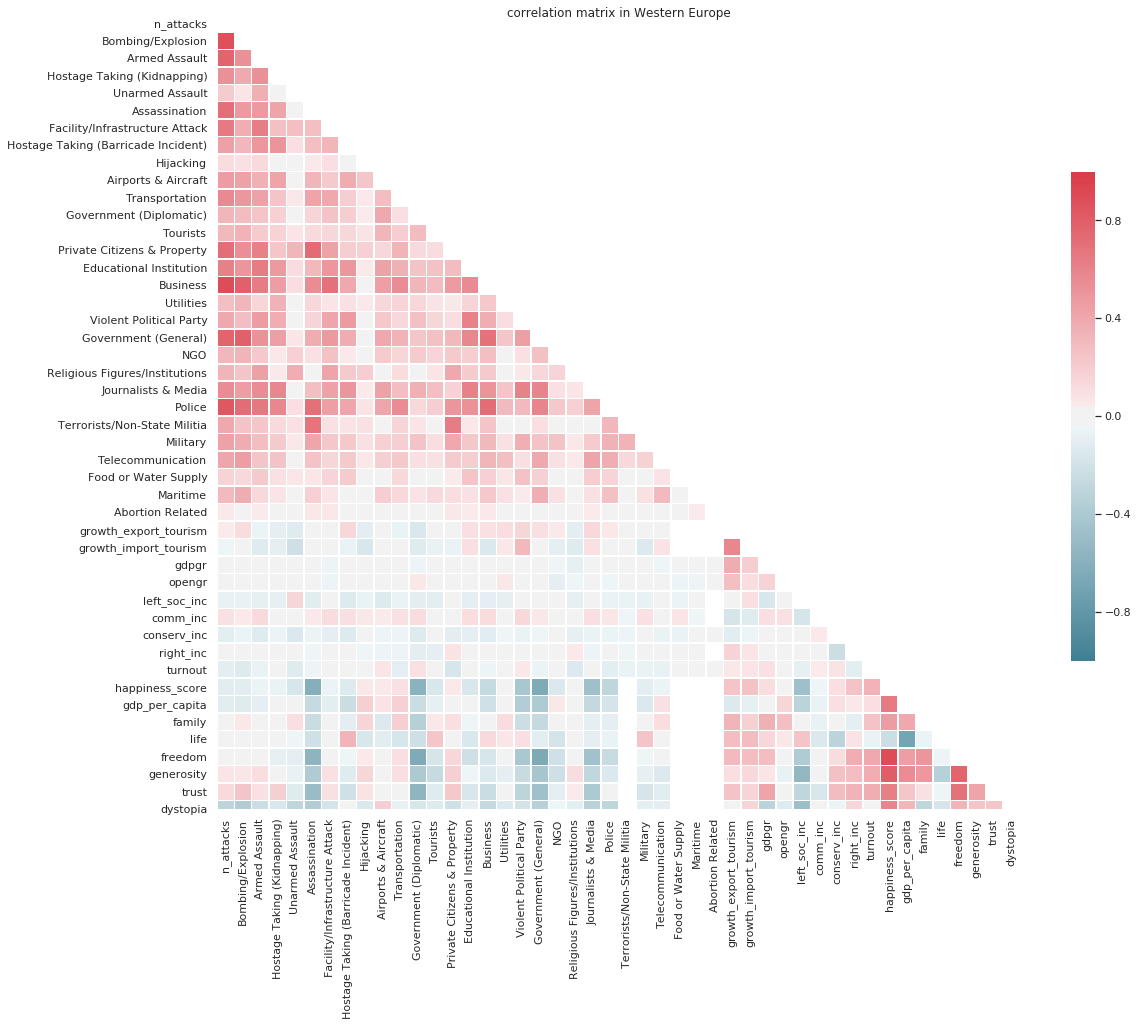

In [84]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

corr = global_df[global_df.region_txt.isin(['Western Europe'])].drop(['year','country_code','region_txt','Unknown'],axis=1).corr()

sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(F'correlation matrix in Western Europe')

plt.show()

## North America

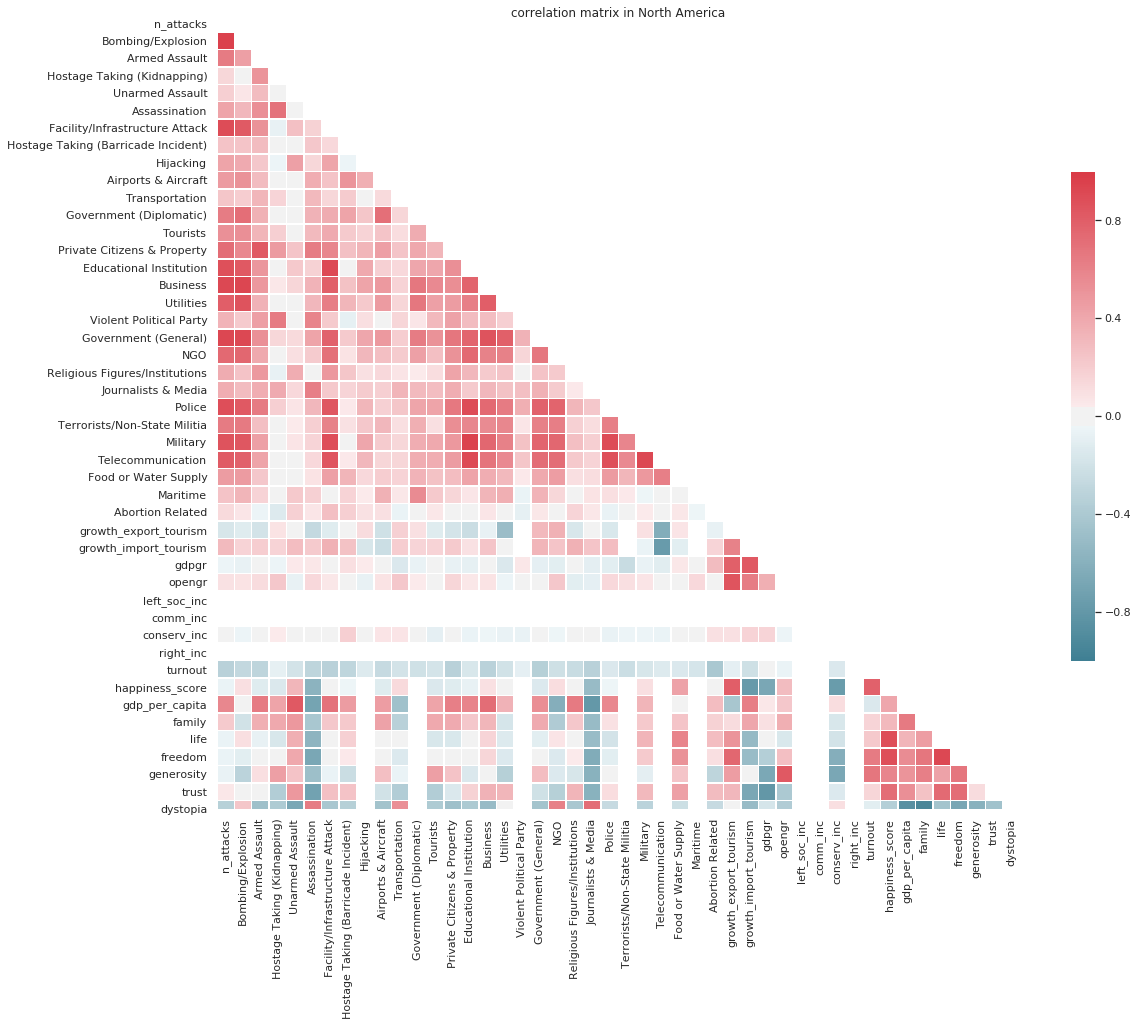

In [86]:
corr = global_df[global_df.region_txt.isin(['North America'])].drop(['year','country_code','region_txt','Unknown'],axis=1).corr()

sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(F'correlation matrix in North America')

plt.show()

## South Asia

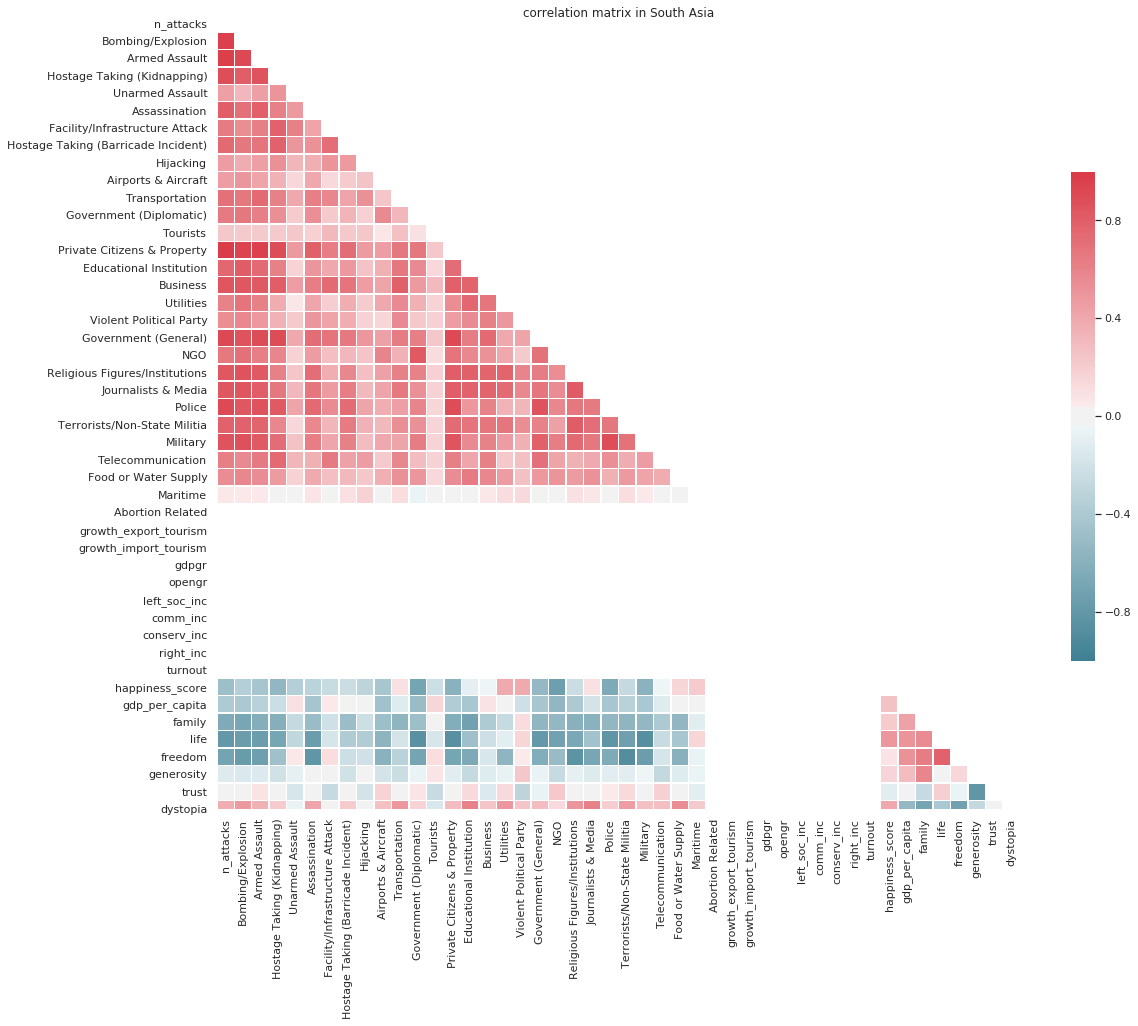

In [88]:
corr = global_df[global_df.region_txt.isin(['South Asia'])].drop(['year','country_code','region_txt','Unknown'],axis=1).corr()

sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(F'correlation matrix in South Asia')

plt.show()

# Visualisations on world map

In [0]:
feature = 'nattacks'
year = 2015
# Take only value of year 2001
df = global_df[global_df.year.isin([year])].copy()[['year','country_code',feature]]
df[feature].fillna(0,inplace=True)
df.head()

,year,country_code,nattacks
0,2015,CHE,0.0
1,2015,ISL,0.0
2,2015,DNK,5.0
3,2015,NOR,0.0
4,2015,CAN,5.0


In [0]:
import geopandas as gpd
shapefile = 'ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.drop('ADMIN',axis=1,inplace=True)
#Rename columns.
gdf.columns = ['country_code', 'geometry']
gdf.head()

,country_code,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [0]:
merged_df = gdf.merge(df, on='country_code',how='left')
# If nan in year, there is no data abound the feature
merged_df[feature].mask(merged_df.year.isna(),'No Data',inplace=True)
# If year is not nan, there is data in the feature and it is 0
#merged_df['nattacks'].replace(np.nan,0,inplace=True)

In [0]:
merged_df.head()

,country_code,geometry,year,nattacks
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2015.0,0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2015.0,14
2,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,No Data
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2015.0,5
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2015.0,38


In [0]:
import json
#Read data to json.
merged_json = json.loads(merged_df.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [0]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, LogColorMapper
from bokeh.palettes import brewer

#Display figure inline in Jupyter Notebook.
output_notebook()

In [0]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest number of attacks.
palette = palette[::-1]
#Instantiate LogColorMapper that log maps numbers in a range, into a sequence of colors.
color_mapper = LogColorMapper(palette = palette, low = 0, high = 500, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'500':'>500'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 850, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = F'{feature} in {year}', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :feature, 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure.
show(p)